In [2]:
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
with open("/Users/aysegul/Documents/GitHub/API_dosya_cekme/data/processed/marketing_data.pkl", "rb") as f:
    df = pickle.load(f)

In [4]:
df

,Channel,Campaign,Impressions,Clicks,Conversions,Spend (USD),Revenue (USD),ROAS,CTR(%),CR(%)
0,Google Ads,Summer_Sale,12000,950,48,300.0,1250.0,4.166667,7.916667,5.052632
1,Facebook,Summer_Sale,10000,720,30,200.0,800.0,4.000000,7.200000,4.166667
2,Instagram,Summer_Sale,8000,500,25,180.0,650.0,3.611111,6.250000,5.000000
3,LinkedIn,B2B_Offer,5000,240,10,150.0,500.0,3.333333,4.800000,4.166667
4,Email,Weekly_Deals,3000,400,35,20.0,450.0,22.500000,13.333333,8.750000
5,Google Ads,Winter_Sale,14000,1100,60,350.0,1600.0,4.571429,7.857143,5.454545
6,Facebook,Winter_Sale,11000,760,32,220.0,900.0,4.090909,6.909091,4.210526
7,Instagram,Winter_Sale,9000,510,24,190.0,700.0,3.684211,5.666667,4.705882
8,YouTube,Video_Ad_1,20000,820,22,400.0,1000.0,2.500000,4.100000,2.682927
9,Twitter,Flash_Deal,6000,300,12,90.0,300.0,3.333333,5.000000,4.000000


In [5]:
# Feature (X) and (y)
X = df[['Impressions', 'Clicks', 'Conversions', 'Spend (USD)']]
y = df['ROAS']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,feature_types,None


In [8]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.534471560633558


In [9]:
Q1 = df['ROAS'].quantile(0.25)
Q3 = df['ROAS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df_clean = df[(df['ROAS'] >= lower_bound) & (df['ROAS'] <= upper_bound)]

In [11]:
X_clean = df_clean[['Spend (USD)', 'Impressions', 'Clicks', 'Conversions']]  
y_clean = df_clean['ROAS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"XGBoost R2 Skoru (temiz veri): {r2:.4f}")

XGBoost R2 Skoru (temiz veri): 0.3571


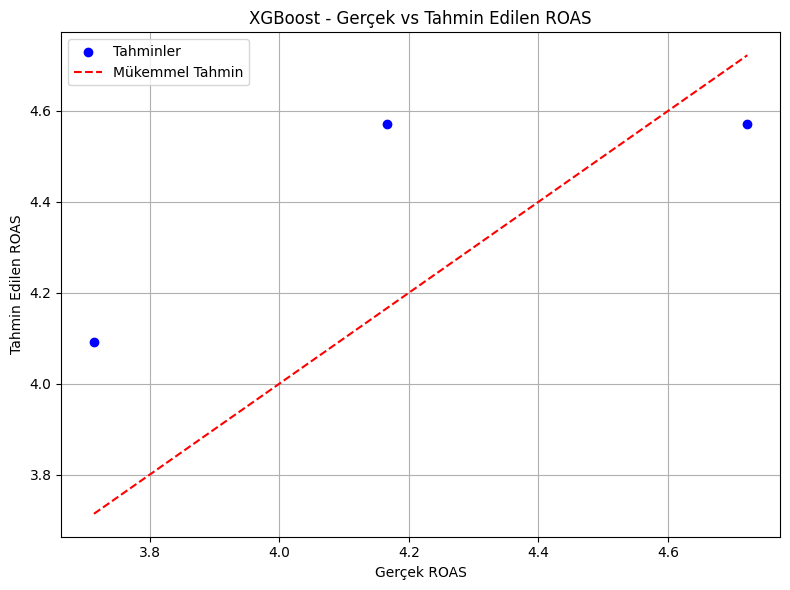

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahminler')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Mükemmel Tahmin')
plt.xlabel('Gerçek ROAS')
plt.ylabel('Tahmin Edilen ROAS')
plt.title('XGBoost - Gerçek vs Tahmin Edilen ROAS')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import os
os.getcwd()

'/Users/aysegul'